# **Tarea #1 Interpolación**

## Integrantes

*   Gabriela María Castro Beltran
*   Juan Nicolas Carvajal Useche

Primero, se importan las librerías e imágenes requeridas para el desarrollo del taller.

In [ ]:
# Importar librerias
import os
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Importar imágenes
imagen = cv2.imread("checkerboard_18x18.png", cv2.IMREAD_COLOR)
calle = cv2.imread("calle.jpg", cv2.IMREAD_COLOR)
calle=calle[:, :, ::-1]

# 1. **Tecnicas de interpolación**

Las técnicas de interpolación son métodos matemáticos utilizados para estimar valores desconocidos entre puntos de datos conocidos. Estos puntos de datos conocidos suelen estar distribuidos de manera discreta en el espacio o en el tiempo. La interpolación es útil cuando se desea estimar valores intermedios o continuos en función de los valores existentes, y se basa en la suposición de que los datos entre los puntos conocidos cambian de manera gradual y suave.

Existen varias técnicas de interpolación, cada una con sus propias características y aplicaciones. Algunas de las técnicas más comunes incluyen:



*   **Interpolación lineal:** Esta técnica conecta dos puntos de datos conocidos con una línea recta y estima valores intermedios a lo largo de esa línea.
*   **Interpolación polinómica:** Se ajustan polinomios a los puntos conocidos, como el polinomio de Lagrange o el polinomio de Newton. Estos polinomios pasan exactamente por los puntos de datos conocidos y pueden proporcionar una buena aproximación
*  **Interpolación por splines:** Los splines son curvas suaves compuestas por segmentos polinómicos más pequeños. Los splines cúbicos son especialmente populares y se utilizan para aproximar los datos con suavidad.

* **Interpolación por vecino más cercano:** En esta técnica, el valor desconocido se estima tomando el valor del punto conocido más cercano. Aunque es simple, puede producir resultados poco suaves y sensibles a variaciones en los datos conocidos.

Pero en este documento se analizará las siguientes tecnicas de interpolación:
* **Vecino más cercano**
* **Bilineal**
* **Bicúbica**
* **B-splines**


# 1.1 Interpolación del vecino más cercano

Se utiliza para estimar valores desconocidos basándose en los valores de los puntos de datos conocidos más cercanos.

Los pasos que debemos seguir para usar la interpolación del vecino más cercano son:

* Definición de los datos: Organiza tus datos en una lista o matriz por ejemplo.

* Ubicación del punto desconocido

* Cálculo de la distancia: Calcula la distancia entre el punto desconocido y todos los puntos conocidos en tus datos. Puedes utilizar la distancia euclidiana en el caso bidimensional y la diferencia absoluta en el caso unidimensional.

* Encontrar el vecino más cercano: Encuentra el punto conocido más cercano al punto desconocido basándote en la distancia calculada en el paso anterior.

* Estimación del valor: Utiliza el valor del punto conocido más cercano como el valor estimado para el punto desconocido. Esencialmente, estás copiando el valor del vecino más cercano.

Ejemplo con datos:

In [ ]:
datos_conocidos = np.array([2, 5, 8, 11, 14, 18,24,])

punto_desconocido = 16

# Calcular las distancias
distancias = np.abs(datos_conocidos - punto_desconocido)

# Encontrar el índice del vecino más cercano
indice_vecino_cercano = np.argmin(distancias)

# Estimar el valor utilizando el vecino más cercano
valor_estimado = datos_conocidos[indice_vecino_cercano]

# Imprimir el resultado
print(distancias)
print(f"El valor estimado en el punto {punto_desconocido} es: {valor_estimado}")

[14 11  8  5  2  2  8]
El valor estimado en el punto 16 es: 14


Con el apoyo de una ilustración, el proceso se presenta de la siguiente manera: cuando se amplía la imagen original para ocupar un espacio mayor, no siempre se cuentan con datos en cantidad suficiente para llenar toda la matriz resultante. Por lo tanto, se toma la información más próxima y completa de la imagen existente y se copia en las áreas faltantes de la imagen ampliada, logrando así su escalado.

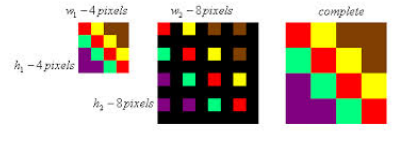

A continucaión se realiza el procedimiento para el desarrollo de la interpolacón del vecino más cercano en una imagen. La función "vecino_cercano" comienza tomando dos parámetros: la imagen original y un factor de escalamiento. Este factor determina cuánto cambiará el tamaño de la imagen. A partir de las dimensiones (alto, ancho y canales de color) de la imagen original, se calculan las nuevas dimensiones para la imagen escalada multiplicando las dimensiones originales por el factor de escalamiento.

Luego, se crea una matriz vacía que servirá como representación de la imagen escalada. Esta matriz tiene dimensiones basadas en el tamaño calculado y mantiene el mismo número de canales de color que la imagen original.

El proceso principal ocurre en un par de bucles anidados que recorren cada píxel en la nueva imagen escalada. Para cada píxel, se determina su ubicación correspondiente en la imagen original dividiendo las coordenadas del píxel escalado por el factor de escalamiento. Esto ayuda a identificar el píxel más cercano en la imagen original.

El valor del píxel en la posición encontrada en la imagen original se transfiere a la posición correspondiente en la nueva imagen escalada.

Finalmente, la función devuelve la imagen escalada con los ajustes realizados.

In [ ]:
#Se puede crear una función que realice la interpolación del vecino en donde redimensiona la imagen
def vecino_cercano(imagen, factor):
    height, width, channels = imagen.shape #Guarda el tamaño de la imagen
    new_width = int(width * factor);
    new_height = int(height * factor);
    new_imagen = np.zeros((new_height, new_width, channels), dtype=np.uint8); #nuevo tamaño de la imagen

    for y in range(new_height):
        for x in range(new_width):
            new_x = int(x / factor);# posición de x en la imagen nueva
            new_y = int(y / factor);# posición de y en la imagen nueva
            new_imagen[y, x] = imagen[new_y, new_x];

    return new_imagen

Text(0.5, 1.0, 'Interpolada')

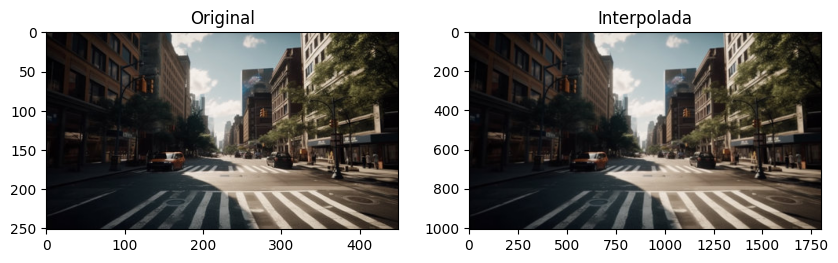

In [71]:
new = vecino_cercano(calle,4);
plt.figure(figsize=[10, 5])
plt.subplot(121); plt.imshow(calle); plt.title("Original")
plt.subplot(122); plt.imshow(new); plt.title("Interpolada")

También con open cv se puede usar la función *resize* que permite realizar la interpolación del vecino más cercano (junto con otras opciones de interpolación)

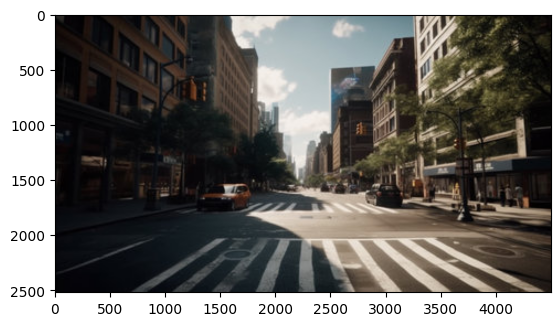

In [72]:
Img_resize = cv2.resize(calle, None, fx=10, fy=10, interpolation=cv2.INTER_NEAREST)#  indica que el tamaño de salida. Esto es útil cuando deseas escalar la imagen en una dirección específica (horizontal o vertical)
plt.imshow(Img_resize)


# 1.2 Interpolación Bilineal

En la interpolación bilineal, se utiliza una combinación de interpolación lineal en dos direcciones: primero en la dirección horizontal y luego en la dirección vertical. Los pasos básicos para calcular el valor de un píxel desconocido mediante interpolación bilineal son los siguientes:

* Encontrar los cuatro píxeles vecinos más cercanos al punto de interés en la imagen original.
* Calcular interpolaciones lineales en la dirección horizontal para los dos pares de píxeles vecinos.
* Calcular una interpolación lineal en la dirección vertical entre los resultados de las interpolaciones horizontales.

Este proceso de interpolación considera las diferencias en ambas direcciones y produce resultados más suaves y precisos que la interpolación del vecino más cercano, especialmente cuando se escalan las imágenes a tamaños mayores o menores.

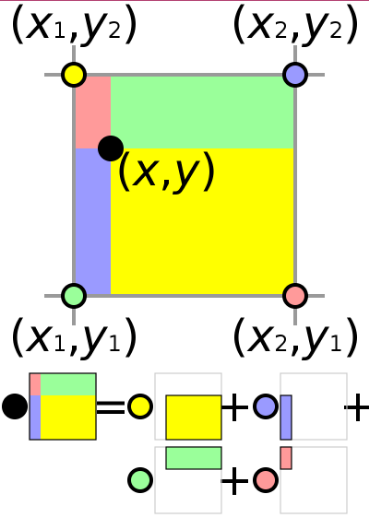


En esta visualización geométrica, el valor del punto negro es la suma del valor en cada punto coloreado multiplicado por el área del rectángulo del mismo color, dividida por el área total de los cuatro rectángulos.

Por ejemplo se tiene lo siguiente:

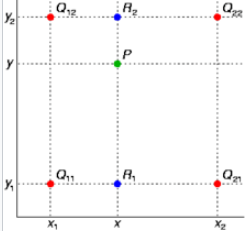

El resultado final esta dado por lo siguiente:

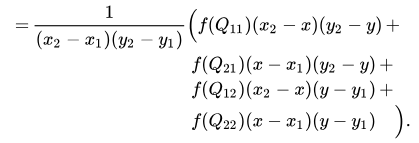

A continucaión se realiza el procedimiento para el desarrollo de la interpolacón bilineal en una imagen. La función llamada "Bilineal" toma dos argumentos: la imagen original y un factor de escala. Este último determina la magnitud del cambio en las dimensiones de la imagen. Las dimensiones de la imagen original se extraen y se calculan las nuevas dimensiones para la imagen escalada. Se crea una matriz vacía que servirá como representación de la imagen escalada. Esta matriz se adapta a las dimensiones calculadas y se utiliza un tipo de datos específico, np.uint16.

Empleando dos bucles anidados, el código recorre cada píxel en la imagen escalada en proceso (new_imagen_bilineal). Para cada píxel en esta imagen, se calculan las coordenadas correspondientes en la imagen original, teniendo en cuenta el factor de escala. A continuación, se determinan las coordenadas de los cuatro píxeles vecinos más cercanos en la imagen original. Estos píxeles rodean al píxel actual en la imagen escalada y se encuentran dispuestos en forma de cuadrado en la imagen original. Con el fin de asegurarse de que las coordenadas de los píxeles vecinos estén dentro de los límites de la imagen original, se utiliza la función np.clip.

La parte fundamental de la técnica de interpolación bilineal radica en el cálculo de los valores interpolados. Dicho cálculo considera tanto los valores de los cuatro píxeles vecinos como las distancias entre estos píxeles y el píxel actual en la imagen escalada. El resultado de esta interpolación se asigna al píxel correspondiente en la nueva imagen escalada (new_imagen_bilineal). Finalmente, la función devuelve la imagen escalada, ya beneficiada por la aplicación de la interpolación bilineal.

In [74]:
#Se puede crear una función que realice la interpolación del vecino en donde redimensiona la imagen
def Bilineal(imagen, factor):
    height, width, channels = imagen.shape #Guarda el tamaño de la imagen
    new_width = int(width * factor)
    new_height = int(height * factor)
    new_imagen_bilineal = np.zeros((new_height, new_width, channels), dtype=np.uint16)# nueiavo tamaño de la imagen

    for y in range(new_height):
        for x in range(new_width):
            new_x = x / factor # posición de x en la imagen nueva
            new_y = y / factor # posición de y en la imagen nueva

            # Coordenadas de los cuatro píxeles vecinos
            #mirar imagen
            #x1,y1 inferior izquierda
            #x2,y1 inferior derecha
            #x2,y2 superior derecha
            #x1,y2 superior izquierda
            x1 = int(new_x)
            x2 = x1 + 1
            y2 = int(new_y)
            y1 = y2 + 1

             # Clip los índices para asegurarte de que estén dentro de los límites
            x1 = np.clip(x1, 0, width - 1)
            x2 = np.clip(x2, 0, width - 1)
            y1 = np.clip(y1, 0, height - 1)
            y2 = np.clip(y2, 0, height - 1)

            # Cálculo de los valores interpolados
            valores_interp = (imagen[y1,x1]*(x2-new_x)*(y2-new_y)+imagen[y1,x2]*(new_x-x1)*(y2-new_y)+imagen[y2,x1]*(x2-new_x)*(new_y-y1)+imagen[y2,x2]*(new_x-x1)*(new_y-y1))/((x2-x1)*(y2-y1))

            new_imagen_bilineal[y,x]=valores_interp

    return new_imagen_bilineal

En el anterior código se usa la función np.clip() que se utiliza para restringir (limitar) los valores de un arreglo dentro de un rango específico. Es especialmente útil cuando se quiere asegurar que los valores no se salgan de ciertos límites.

np.clip(a, a_min, a_max, out=None)

Donde:

* a: El arreglo de entrada que quieres restringir.
* a_min: El valor mínimo permitido. Si algún valor en el arreglo es menor que a_min, será ajustado a a_min.
* a_max: El valor máximo permitido. Si algún valor en el arreglo es mayor que a_max, será ajustado a a_max.
* out: (Opcional) Un arreglo de salida donde se almacenarán los valores limitados. Si no se proporciona, se crea un nuevo arreglo.

Text(0.5, 1.0, 'Bilineal')

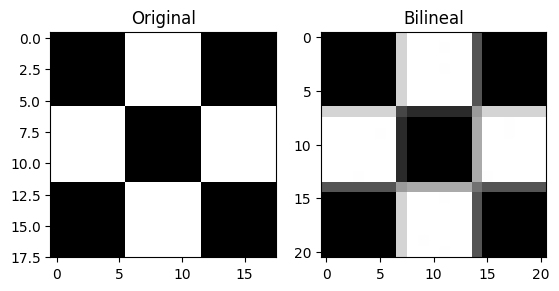

In [ ]:
new_bi=Bilineal(imagen,2)
plt.subplot(121);plt.imshow(imagen);plt.title("Original")
plt.subplot(122);plt.imshow(new_bi);plt.title("Bilineal")

<ipython-input-74-0cb0f36d1179>:31: RuntimeWarning: invalid value encountered in divide
  valores_interp = (imagen[y1,x1]*(x2-new_x)*(y2-new_y)+imagen[y1,x2]*(new_x-x1)*(y2-new_y)+imagen[y2,x1]*(x2-new_x)*(new_y-y1)+imagen[y2,x2]*(new_x-x1)*(new_y-y1))/((x2-x1)*(y2-y1))


Text(0.5, 1.0, 'Bilineal')

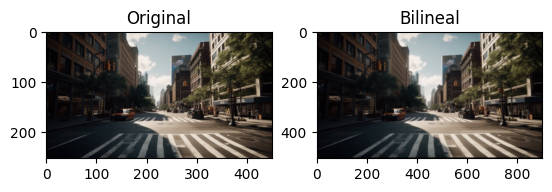

In [77]:
new_bi=Bilineal(calle,2)
plt.subplot(121);plt.imshow(calle); plt.title("Original")
plt.subplot(122);plt.imshow(new_bi); plt.title("Bilineal")

También con open cv se puede usar la función resize que permite realizar la interpolación bilineal (junto con otras opciones de interpolación)

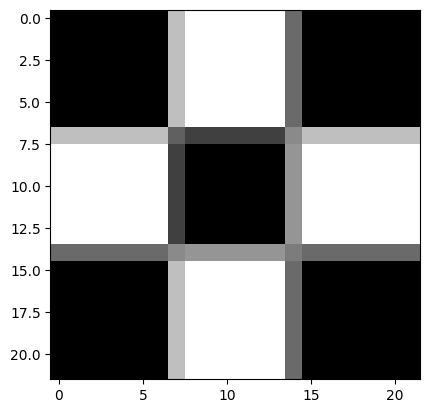

In [ ]:
Img_resize_bi = cv2.resize(imagen, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR) #indica que el tamaño de salida. Esto es útil cuando deseas escalar la imagen en una dirección específica (horizontal o vertical)
plt.imshow(Img_resize_bi)

# 1.3 La interpolación bicúbica

La interpolación bicúbica es un método de interpolación utilizado en procesamiento de imágenes y gráficos para suavizar y estimar valores de píxeles entre ubicaciones conocidas. A diferencia de la interpolación bilineal que utiliza solo los valores de los píxeles vecinos más cercanos, la interpolación bicúbica utiliza un enfoque más avanzado que involucra una mayor cantidad de píxeles vecinos para calcular el valor interpolado.

En la interpolación bicúbica, se consideran los 16 píxeles vecinos más cercanos a la ubicación deseada. Estos píxeles se organizan en una matriz 4x4, y se realiza un cálculo ponderado basado en funciones cúbicas en dos dimensiones para estimar el valor del píxel interpolado. Cada uno de los 16 píxeles vecinos contribuye al valor interpolado de manera ponderada según su distancia y posición relativa.


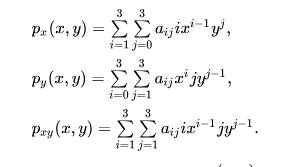


A continucaión se realiza el procedimiento para el desarrollo de la interpolacón bicúbica en una imagen. Definimos la función interpolate_bicubic que toma una imagen y coordenadas (x, y) y realiza la interpolación bicúbica en esas coordenadas para obtener el valor del píxel interpolado. Esta función utiliza una matriz de coeficientes y realiza los cálculos necesarios para la interpolación.

Cargamos la imagen en escala de grises usando cv2.imread() con la bandera cv2.IMREAD_GRAYSCALE.

Definimos el factor de escala (scale_factor) por el cual queremos aumentar el tamaño de la imagen.

Calculamos las nuevas dimensiones de la imagen escalada (new_height y new_width) multiplicando las dimensiones originales por el factor de escala.

Creamos una nueva imagen (scaled_image) con las dimensiones de la imagen escalada.

Utilizamos dos bucles anidados (for y y for x) para iterar a través de cada píxel en la imagen escalada.

Dentro de los bucles, calculamos las coordenadas originales (src_x y src_y) a partir de las coordenadas escaladas (x e y) y el factor de escala inverso.

In [78]:
def Cubica(x):
    if abs(x) <= 1:
        return 1 - 2 * abs(x)**2 + abs(x)**3
    elif 1 < abs(x) < 2:
        return 4 - 8 * abs(x) + 5 * abs(x)**2 - abs(x)**3
    else:
        return 0

def Bicubica(image, scale):
    height, width = image.shape[:2]
    new_height = int(height * scale)
    new_width = int(width * scale)

    new_image = np.zeros((new_height, new_width, 3), dtype=np.uint32)

    for y in range(new_height):
        for x in range(new_width):
            src_x = x / scale
            src_y = y / scale

            x1 = int(src_x)
            y1 = int(src_y)

            fraction_x = src_x - x1
            fraction_y = src_y - y1

            pixel_value = np.zeros(3)

            for i in range(-1, 3):
                for j in range(-1, 3):
                    if 0 <= y1 + i < height and 0 <= x1 + j < width:
                        weight_x = Cubica(fraction_x - j)
                        weight_y = Cubica(fraction_y - i)
                        pixel_value += weight_x * weight_y * image[y1 + i, x1 + j]

            new_image[y, x] = np.clip(pixel_value, 0, 255).astype(np.uint32)

    return new_image

Text(0.5, 1.0, 'Bicubica')

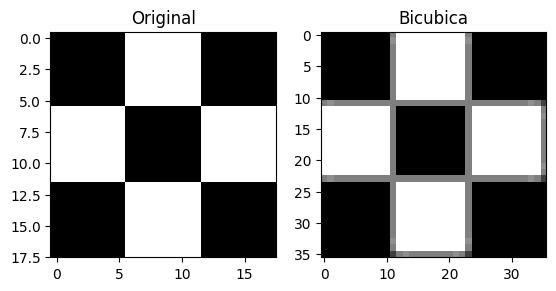

In [ ]:
new_bic = Bicubica(imagen,2)
plt.subplot(121);plt.imshow(imagen);plt.title("Original")
plt.subplot(122);plt.imshow(new_bic);plt.title("Bicubica")

También se puede usar la implementación de la función resize, usando la opción de interpolación cúbica.

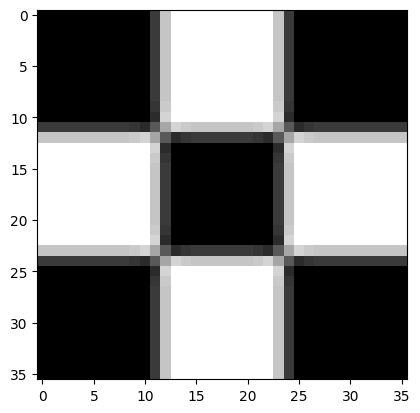

In [ ]:
Img_resize_bi = cv2.resize(imagen, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)  #indica que el tamaño de salida. Esto es útil cuando deseas escalar la imagen en una dirección específica (horizontal o vertical)
plt.imshow(Img_resize_bi)




# 1.4 La interpolación B-splines o segmentaria

La interpolación B-spline es una técnica utilizada en el procesamiento de imágenes para construir nuevos puntos de datos dentro del rango de un conjunto discreto de puntos de datos conocidos. Esta técnica es útil para suavizar, filtrar, ampliar y reducir imágenes.

La teoría de B-splines se basa en la idea de que una curva suave puede ser representada como una combinación lineal de funciones básicas llamadas B-splines. Estas funciones son definidas por un conjunto de puntos de control y un conjunto de nodos, que determinan la forma y suavidad de la curva.

En el contexto del procesamiento de imágenes, la interpolación B-spline se utiliza para construir una imagen continua a partir de una imagen discreta. Esto se logra mediante el uso de B-splines para aproximar los valores de los píxeles en la imagen continua. La calidad de la interpolación depende del orden de las B-splines utilizadas y del método utilizado para manejar los bordes de la imagen.

Este código define dos funciones: B_spline y B_spline_color. La función B_spline_color toma como argumentos el nombre del archivo de imagen a color y el nuevo tamaño de la imagen en formato (ancho, alto), así como los órdenes kx y ky de las B-splines utilizadas en las direcciones x e y. La función carga la imagen a color y separa sus canales de color. Luego aplica la función b_spline_interpolation_channel a cada canal por separado y combina los resultados para obtener la imagen interpolada a color.

La función B_spline toma como argumentos un canal de color y el nuevo tamaño del canal en formato (ancho, alto), así como los órdenes kx y ky de las B-splines utilizadas en las direcciones x e y. La función crea una malla de coordenadas para el canal original y el canal interpolado. Luego utiliza la clase RectBivariateSpline para calcular los coeficientes de B-spline y realizar la interpolación.

In [81]:
from scipy.interpolate import RectBivariateSpline

def B_spline(img, factor, kx=3, ky=3):
    # Carga la imagen en escala de grises

    # Obtiene las dimensiones de la imagen
    (h, w) = img.shape[:2]

    # Crea una malla de coordenadas para la imagen original
    y = np.arange(h)
    x = np.arange(w)
    xx, yy = np.meshgrid(x, y)

    # Crea una malla de coordenadas para la imagen interpolada
    new_y = np.linspace(0, h-1, h*factor)
    new_x = np.linspace(0, w-1, w*factor)
    new_xx, new_yy = np.meshgrid(new_x, new_y)

    # Calcula los coeficientes de B-spline y realiza la interpolación
    spline = RectBivariateSpline(y, x, img, kx=kx, ky=ky)
    interpolated = spline.ev(new_yy, new_xx)

    return interpolated

Si quieres la interpolación a color de la imagen, se hace la interpolación B-spline a cada canal.

In [82]:
def B_spline_color(image, factor, kx=3, ky=3):
    # Carga la imagen a color
    img = cv2.imread(image,cv2.IMREAD_COLOR)

    # Separa los canales de color
    b, g, r = cv2.split(img)

    # Realiza la interpolación B-spline en cada canal de color
    b_interpolated = B_spline(b, factor, kx, ky)
    g_interpolated = B_spline(g, factor, kx, ky)
    r_interpolated = B_spline(r, factor, kx, ky)

    # Combina los canales de color interpolados
    interpolated = cv2.merge((b_interpolated, g_interpolated, r_interpolated))

    return interpolated

Text(0.5, 1.0, 'Imagen B_spline_color')

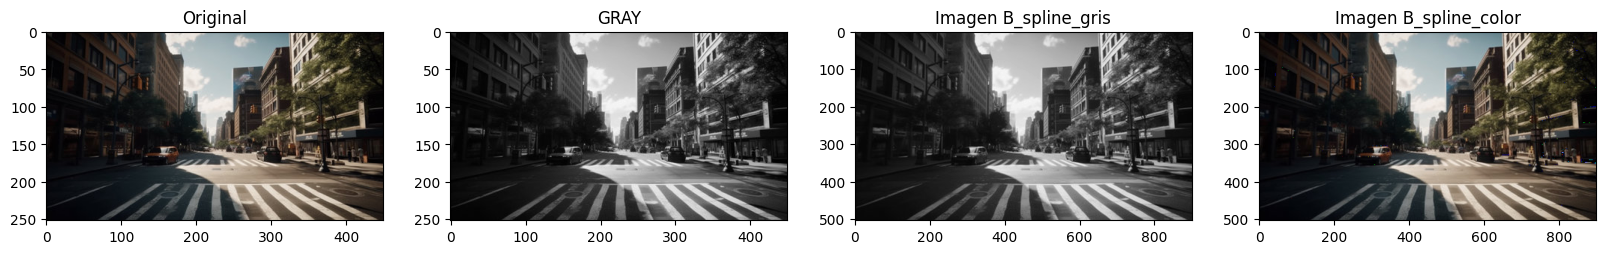

In [85]:
i_g=cv2.imread("calle.jpg", cv2.IMREAD_GRAYSCALE)
img_B=B_spline(i_g,2)
img_B_color=B_spline_color("calle.jpg",2)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(calle);plt.title("Original")
plt.subplot(142);plt.imshow(i_g, cmap="gray");plt.title("GRAY")
plt.subplot(143);plt.imshow(img_B,cmap="gray");plt.title("Imagen B_spline_gris")
#Como el tipo de imagen es float (interpolate.dtpe) se tiene que hacer esta conversion para mostrar la imagen a uint8
plt.subplot(144);plt.imshow(cv2.cvtColor(img_B_color.astype(np.uint8), cv2.COLOR_BGR2RGB));plt.title("Imagen B_spline_color")

# 2. Desempeño de las técnicas de interpolación

*   Vecino más cercano: Esta técnica es la más fácil de implementar pero a su vez puede generar resultados pixelados si se exige un factor de escala muy elevado. Esto ocasiona que los resultados puedan no ser suaves o realistas. Los resultados obtenidos aquí muestran que es una solución adecuada, además se observa que la función implementada manualmente genera resultados muy similares a la función resize de la biblioteca de OpenCV.

*   Bilineal: Aunque es un poco más compleja que la del vecino más cercano, esta técnica sigue siendo fácil de implementar debido a la simplicidad del cálculo, a su vez esto hace su tiempo de procesamiento y requerimientos computacionales sean apropiados para obtener resultados con buena calidad y con poco consumo de recursos. Por otra parte, esta interpolación genera transiciones más suaves entre los colores y detalles de la imagen original, pero en algunos casos puede seguir arrojando algunos bordes gruesos. También se observa que tanto la función implementada manualmente como la de la librería arrojan resultados muy similares.

*   Bicúbica: Esta interpolación es más compleja que la bilineal, lo cual hace que genere una mejor calidad, resultados más realistas y suaves y detalles más finos. Esto también hace que sea más lenta y requiera de más recursos que las dos anteriores. En este caso, los resultados de la función implementada a mano también corresponden con los de la función de la librería.

*   B-Splines: Los splines plantean curvas suaves con condiciones de frontera específicas, es por eso que se deben plantear las ecuaciones de cada spline con sus condiciones requeridas. Por esto, es el procedimiento más complicado de todas las técnicas estudiadas aquí, pero a su vez la que mejores resultados puede generar, esto depende también del orden de los splines que se deseen usar, si se eleva el orden, entonces crece la calidad y también su complejidad de planteamiento. En las imágenes como tal, genera bordes y transiciones muy suaves pero su costo computacional y tiempo de procesamiento es grande. En lo mostrado aquí, se observa también que la implementación manual y la generada por la función de la librería de OpenCV son muy similares.


En conclusión, la elección de la técnica de interpolación depende del equilibrio entre la calidad visual deseada y el rendimiento. Cuando se busca obtener una calidad óptima y existe la disposición de sacrificar un poco de tiempo de procesamiento, suele preferirse recurrir a las técnicas más avanzadas, como la interpolación bicúbica y las B-splines. Sin embargo, en situaciones donde se requiere un procesamiento en tiempo real o cuando el tiempo de ejecución es un factor crítico, las técnicas más sencillas, como el método del vecino más cercano o la interpolación bilineal, pueden ser más apropiadas.



# 3. Rotar una imagen

La función rotate_image toma como argumentos el nombre del archivo de imagen y el ángulo de rotación en grados. Primero, la función carga la imagen usando cv2.imread y obtiene sus dimensiones (h, w).

Luego, calcula el centro de la imagen center como (w / 2, h / 2) y obtiene la matriz de rotación M usando cv2.getRotationMatrix2D. Esta matriz se usa para rotar la imagen en el ángulo dado.

Sin embargo, cuando rotamos una imagen, sus dimensiones pueden cambiar. Por ejemplo, si rotamos una imagen rectangular 90 grados, su ancho y alto se intercambian. Para asegurarnos de que la imagen rotada no se corte, necesitamos calcular las nuevas dimensiones de la imagen rotada.

Para hacer esto, usamos las propiedades trigonométricas del coseno y el seno. Primero, obtenemos los valores absolutos del coseno y el seno de la matriz de rotación M. Luego, usamos estos valores para calcular las nuevas dimensiones de la imagen rotada nW y nH como (h * sin) + (w * cos) y (h * cos) + (w * sin), respectivamente.

Una vez que tenemos las nuevas dimensiones de la imagen rotada, ajustamos la matriz de rotación M para tener en cuenta el cambio de dimensiones. Esto se hace sumando (nW / 2) - center[0] y (nH / 2) - center[1] a los elementos M[0, 2] y M[1, 2], respectivamente.

Finalmente, usamos la función cv2.warpAffine para rotar la imagen usando la matriz de rotación ajustada M y las nuevas dimensiones nW y nH. La imagen rotada se muestra con interpolación lineal usando cv2_imshow.

In [86]:
def rotate_image(img, angle,background_color):
    # Carga la imagen

    # Obtiene las dimensiones de la imagen
    (h, w) = img.shape[:2]

    # Calcula el centro de la imagen
    center = (w / 2, h / 2)

    # Obtiene la matriz de rotación
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Calcula las dimensiones de la imagen rotada
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # Ajusta la matriz de rotación para tener en cuenta el cambio de dimensiones
    M[0, 2] += (nW / 2) - center[0]
    M[1, 2] += (nH / 2) - center[1]

    # Crea una imagen de fondo del mismo tamaño que la imagen rotada
    background = np.zeros((nH, nW, 3), dtype=np.uint8)
    background[:] = background_color

    # Rota la imagen y crea una máscara binaria de la imagen original
    rotated = cv2.warpAffine(img, M, (nW, nH), flags=cv2.INTER_LINEAR)
    mask = cv2.warpAffine(np.ones((h, w), dtype=np.uint8), M, (nW, nH), flags=cv2.INTER_NEAREST)

    # Copia solo los píxeles de la imagen rotada que corresponden a la imagen original en la imagen de fondo
    background[mask == 1] = rotated[mask == 1]

     # Combina la imagen rotada y la imagen de fondo
     #combined = cv2.addWeighted(rotated, 1, background, 1, 0)

    return background

Text(0.5, 1.0, 'Imagen rotada')

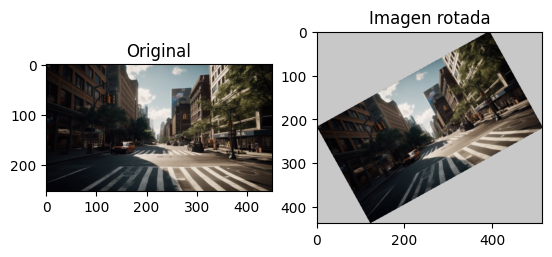

In [87]:
calle_rotate=rotate_image(calle,29,200)
plt.subplot(121);plt.imshow(calle);plt.title("Original")
plt.subplot(122);plt.imshow(calle_rotate);plt.title("Imagen rotada")